# Fashion Recognition NN

In [6]:
# Imports
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import halper

import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch import nn
from torch import optim
from torchvision import datasets, transforms

## Get the data

In [7]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


## View random image from the dataset

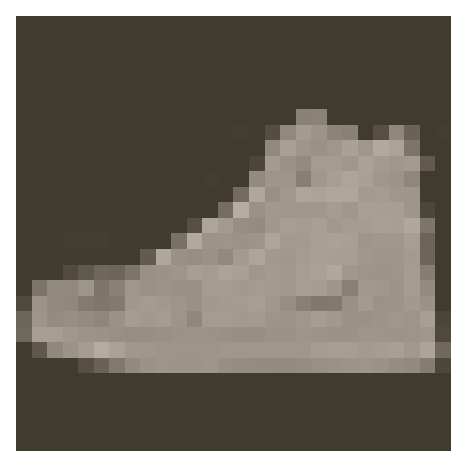

In [17]:
image, label = next(iter(trainloader))
halper.imshow(image[0,:]);

## Define network architecture

In [10]:
#   Each image is 28x28 pixels, 784 in total
#   There are 10 clasees

model = nn.Sequential(nn.Linear(784, 512),
                      nn.ReLU(),
                      nn.Linear(512, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

## Create the network

In [11]:
# Define criterion - NLLLoss or CrossEntropyLoss
criterion = nn.NLLLoss()

# Define optimizer - optim.SGD or optim.Adam
# and Learning Rate
optimizer = optim.SGD(model.parameters(), lr=0.005)

## Train the network

In [22]:
# Adjust hyperparameters (hidden layers, learning rate, etc)
# to get training loss below 0.4

epochs = 50

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss / len(trainloader)}")

Training loss: 0.3328905550163311
Training loss: 0.3257793773100702
Training loss: 0.3205693855738716
Training loss: 0.3141941448280425
Training loss: 0.30785398012888965
Training loss: 0.30302313078186915
Training loss: 0.2961609502003264
Training loss: 0.2933408765078608
Training loss: 0.2887693619343645
Training loss: 0.28235875614193967
Training loss: 0.2782210546817734
Training loss: 0.2736526211616454
Training loss: 0.2706532063467035
Training loss: 0.2660187529141842
Training loss: 0.260663176555115
Training loss: 0.2567913177441051
Training loss: 0.25339539381645637
Training loss: 0.24902396949369515
Training loss: 0.24511583630781947
Training loss: 0.24135568429793375
Training loss: 0.2378738946053011
Training loss: 0.233014943431626
Training loss: 0.23064943547569103
Training loss: 0.2266498269684025
Training loss: 0.22296790873556377
Training loss: 0.22061844506084538
Training loss: 0.21532371876908263
Training loss: 0.21483859939298142
Training loss: 0.2113664903636299
Trai

## Test the network

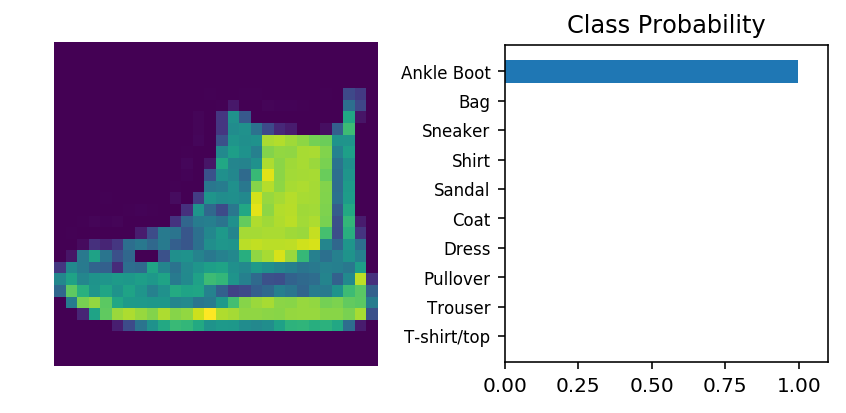

In [23]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the class probabilities (softmax) for img
logps = model.forward(img)
ps = torch.exp(logps)

# Plot the image and probabilities
halper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')